# PursuitEvasion8x8-v0 posggym-agents policy analysis


## Notation

- **Same-play** refers to pairings of policies that are trained together or at least trained as part of the same population
- **Cross-play** refers to pairings of policies that were not trained together

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents.plot as plot_utils

from posggym_agents.agents.pursuitevasion8x8_v0.load import BASE_DIR

# Data Loading

In [2]:
results_filepath = osp.join(BASE_DIR, "results", "pairwise_results.csv")
all_df = plot_utils.import_results(results_filepath)

def get_policy_seed(row, id_key):
    policy_id = row[id_key]
    tokens = policy_id.split("_")
    seed = 'none'
    for t in tokens:
        if t.startswith("seed"):
            seed = t.replace("seed", "")
            break
    return seed
    
def get_policy_type(row, id_key):
    policy_id = row[id_key]
    tokens = policy_id.split("_")
    alg_tokens = []
    for t in tokens:
        if t.startswith("seed"):
            break
        alg_tokens.append(t)
    policy_type = "_".join(alg_tokens)
    if policy_type == "shortestpath-v0":
        policy_type = "shortestpath"
    return policy_type

all_df["policy_seed"] = all_df.apply(lambda r: get_policy_seed(r, "policy_id"), axis=1)
all_df["policy_type"] = all_df.apply(lambda r: get_policy_type(r, "policy_id"), axis=1)
all_df["coplayer_policy_seed"] = all_df.apply(lambda r: get_policy_seed(r, "coplayer_policy_id"), axis=1)
all_df["coplayer_policy_type"] = all_df.apply(lambda r: get_policy_type(r, "coplayer_policy_id"), axis=1)

print("Columns")
print("-------")
for c in all_df.columns:
    print(f"  {c}")

Columns
-------
  Unnamed: 0
  exp_id
  agent_id
  env_name
  policy_id
  exp_seed
  num_episodes
  time_limit
  episode_return_mean
  episode_return_std
  episode_return_max
  episode_return_min
  episode_steps_mean
  episode_steps_std
  episode_time_mean
  episode_time_std
  num_episode_done
  num_LOSS
  num_DRAW
  num_WIN
  num_NA
  episode_return_CI
  episode_steps_CI
  episode_time_CI
  prop_LOSS
  prop_DRAW
  prop_WIN
  prop_NA
  coplayer_policy_id
  policy_seed
  policy_type
  coplayer_policy_seed
  coplayer_policy_type


## The policies

In [3]:
for k in ["agent_id", "policy_seed", "policy_type", "coplayer_policy_seed", "coplayer_policy_type"]:
    values = all_df[k].unique().tolist()
    values.sort()
    print(f"{k}: {values}")
    
policy_ids = all_df["policy_id"].unique().tolist()
policy_ids.sort()

print("\nPolicy IDs")
print("----------")
for pi_id in policy_ids:
    print(f"  {pi_id}")

agent_id: [0, 1]
policy_seed: ['0', '1', '2', '3', '4', 'none']
policy_type: ['klr_k0', 'klr_k1', 'klr_k2', 'klr_k3', 'klr_k4', 'klrbr_k4', 'shortestpath', 'sp']
coplayer_policy_seed: ['0', '1', '2', '3', '4', 'none']
coplayer_policy_type: ['klr_k0', 'klr_k1', 'klr_k2', 'klr_k3', 'klr_k4', 'klrbr_k4', 'shortestpath', 'sp']

Policy IDs
----------
  klr_k0_seed0_i0-v0
  klr_k0_seed0_i1-v0
  klr_k0_seed1_i0-v0
  klr_k0_seed1_i1-v0
  klr_k0_seed2_i0-v0
  klr_k0_seed2_i1-v0
  klr_k0_seed3_i0-v0
  klr_k0_seed3_i1-v0
  klr_k0_seed4_i0-v0
  klr_k0_seed4_i1-v0
  klr_k1_seed0_i0-v0
  klr_k1_seed0_i1-v0
  klr_k1_seed1_i0-v0
  klr_k1_seed1_i1-v0
  klr_k1_seed2_i0-v0
  klr_k1_seed2_i1-v0
  klr_k1_seed3_i0-v0
  klr_k1_seed3_i1-v0
  klr_k1_seed4_i0-v0
  klr_k1_seed4_i1-v0
  klr_k2_seed0_i0-v0
  klr_k2_seed0_i1-v0
  klr_k2_seed1_i0-v0
  klr_k2_seed1_i1-v0
  klr_k2_seed2_i0-v0
  klr_k2_seed2_i1-v0
  klr_k2_seed3_i0-v0
  klr_k2_seed3_i1-v0
  klr_k2_seed4_i0-v0
  klr_k2_seed4_i1-v0
  klr_k3_seed0_i0-v0
 

# The environment

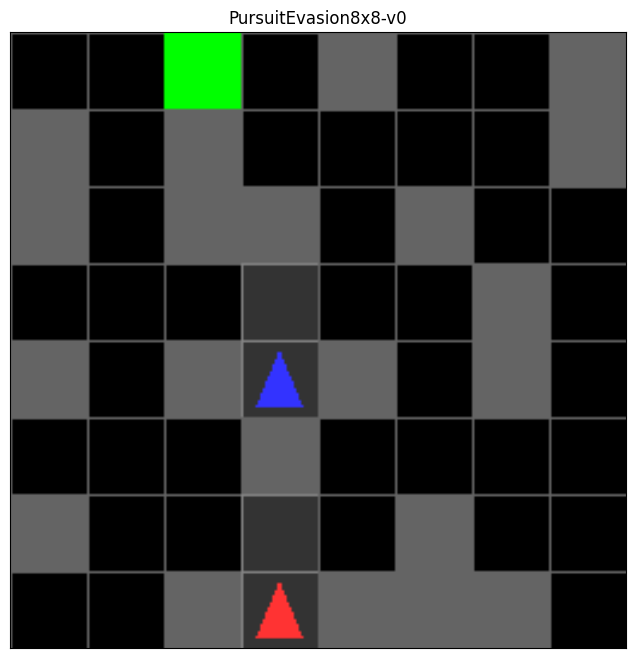

In [4]:
plot_utils.plot_environment(all_df["env_name"].unique()[0])    
plt.show()

## Seperating the Data into groups

In [5]:
df0 = all_df[all_df["agent_id"] == 0]
df1 = all_df[all_df["agent_id"] == 1]

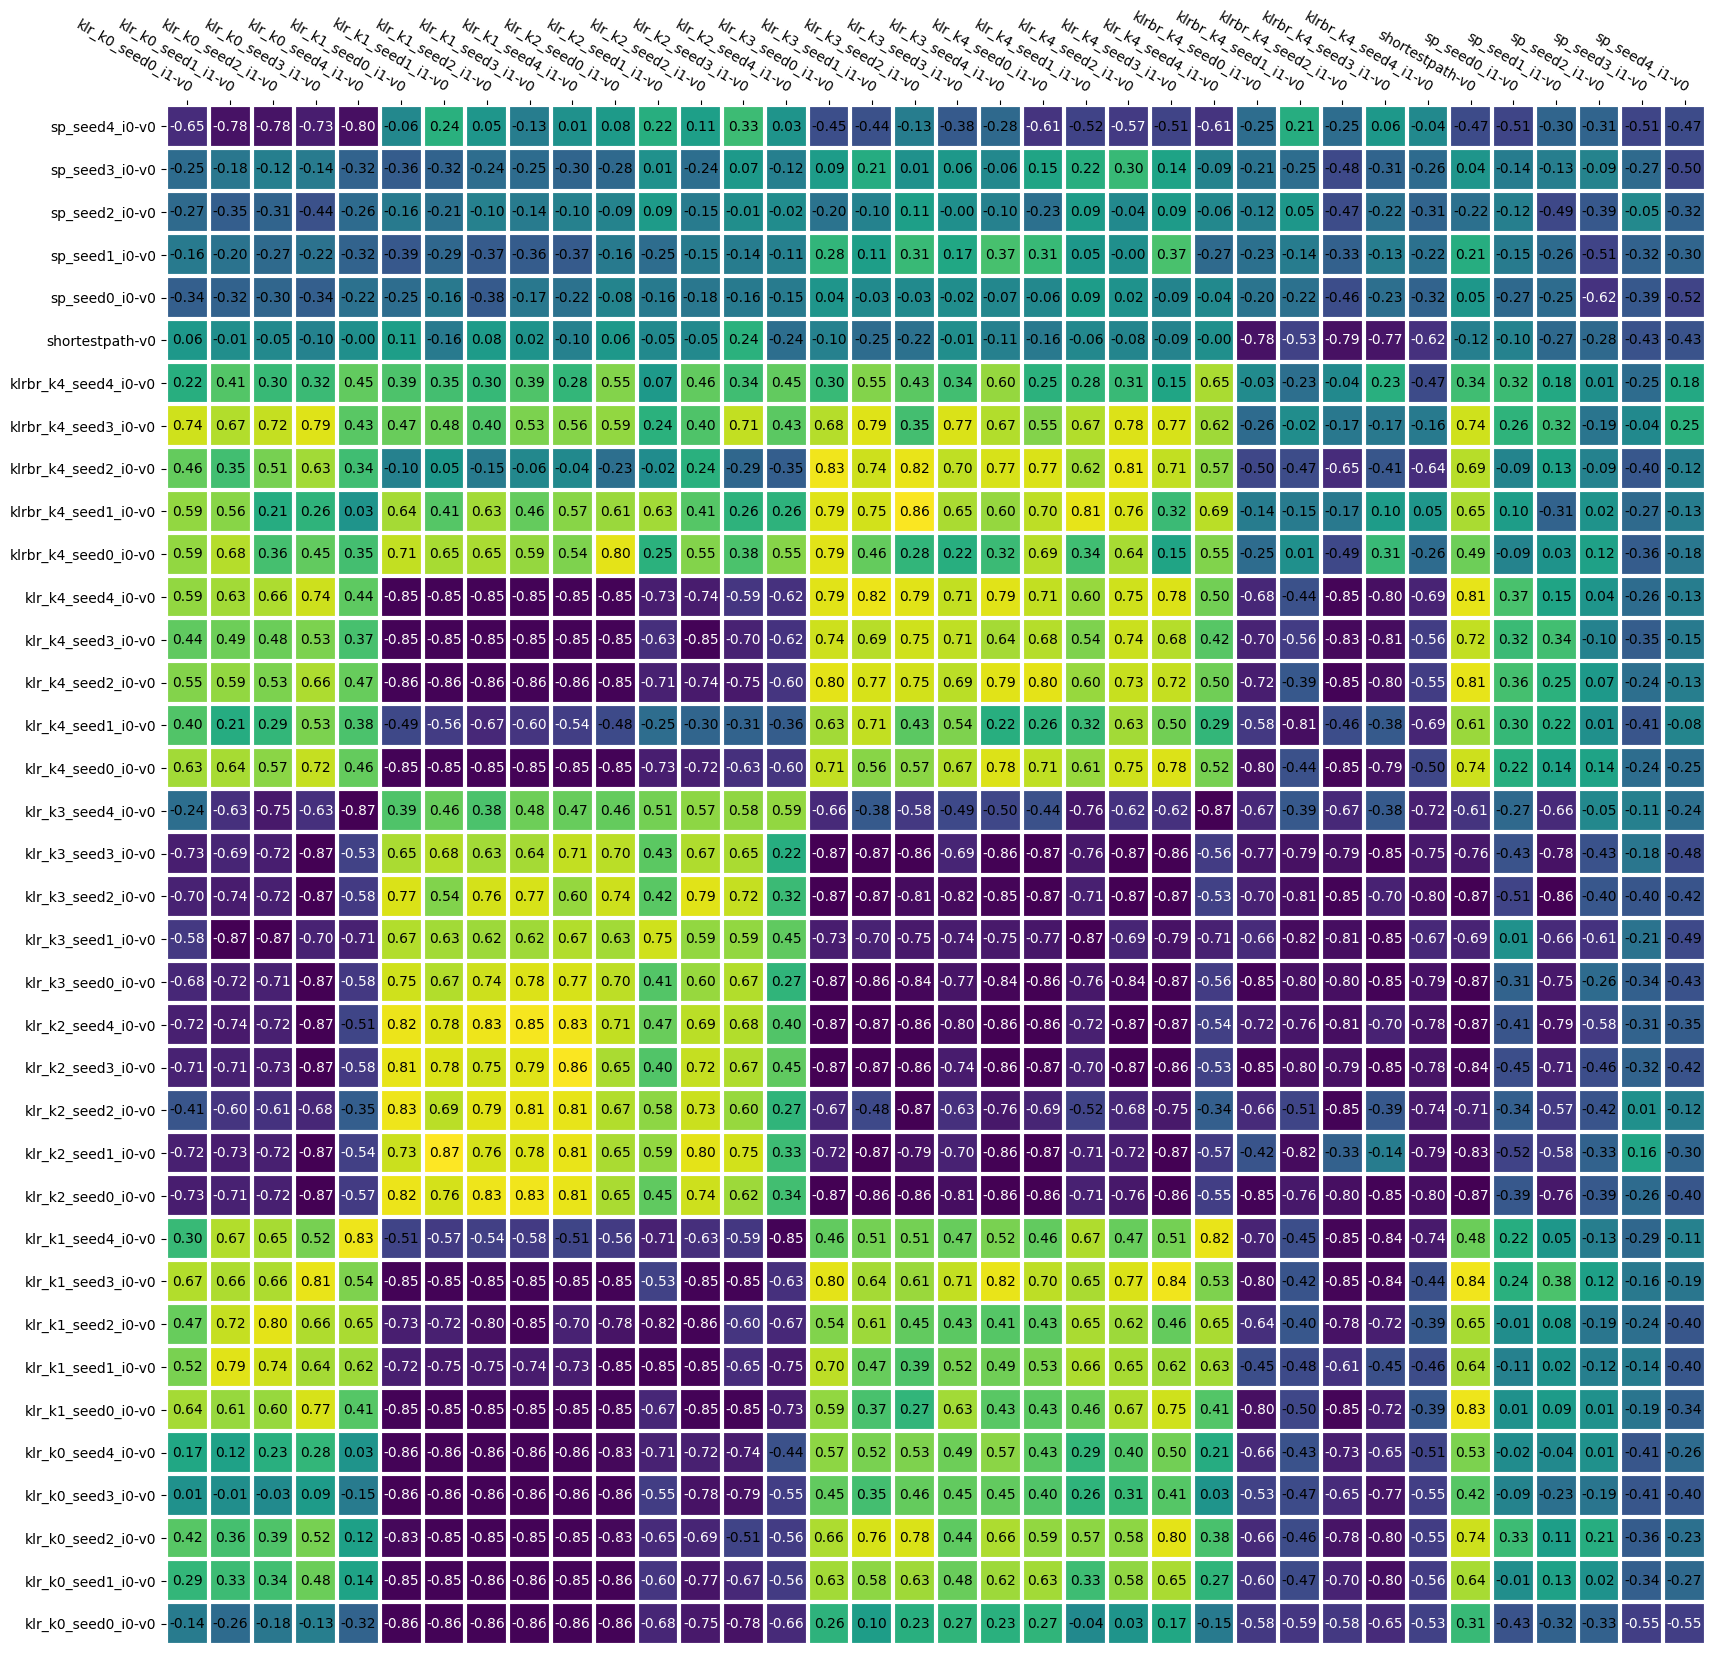

In [6]:
# Performance of Agent 0 policies
plot_utils.plot_pairwise_comparison(
    df0, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

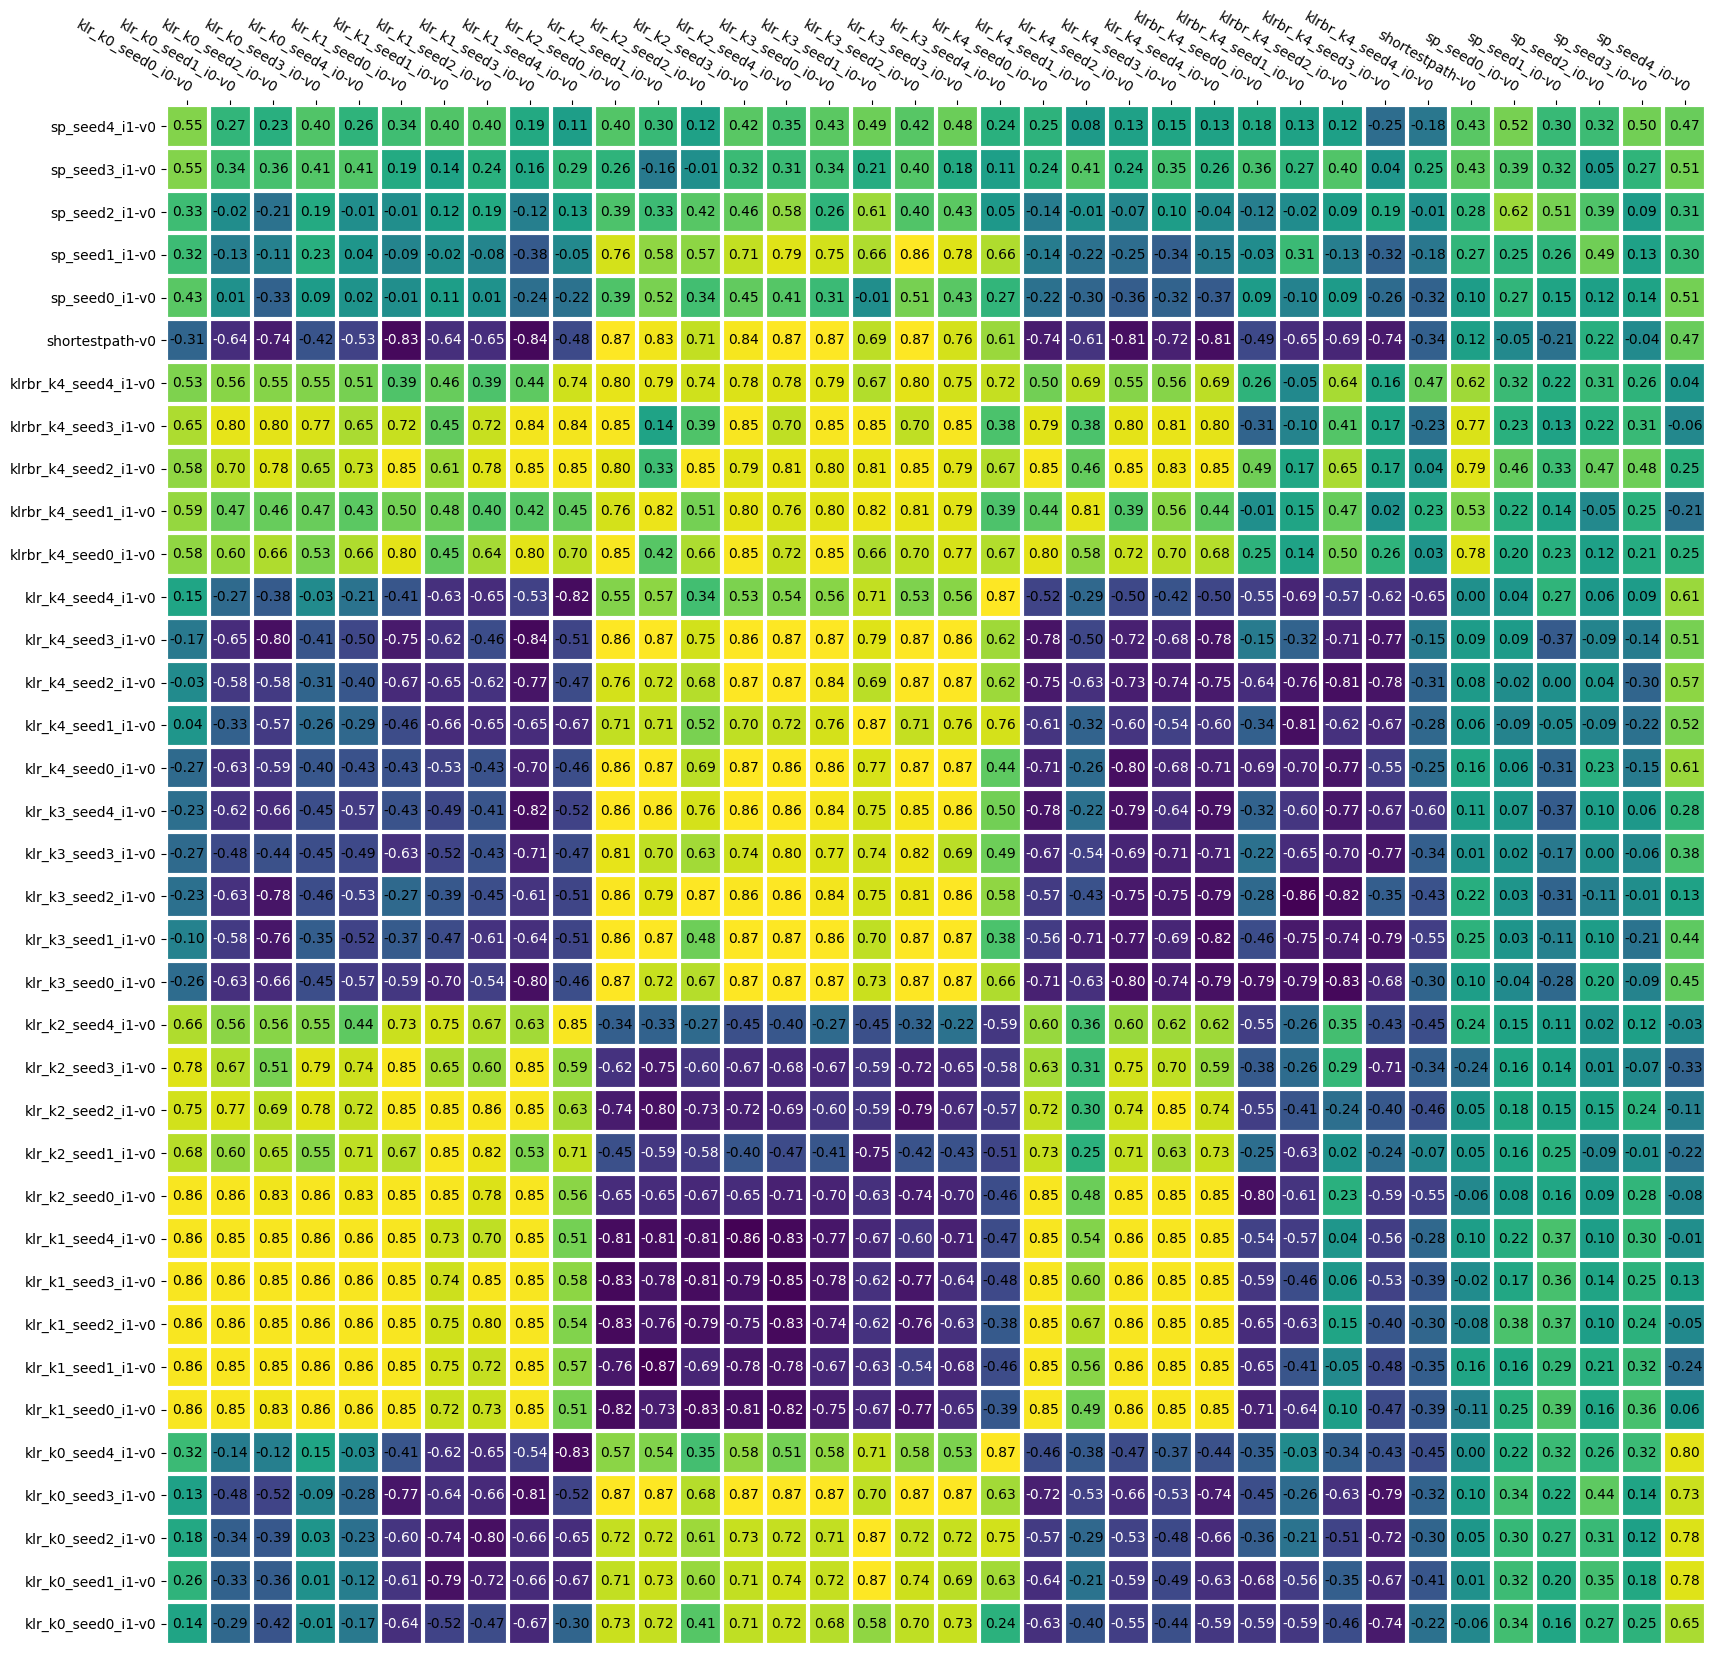

In [7]:
# Performance of Agent 1 policies
plot_utils.plot_pairwise_comparison(
    df1, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Performance by Seed

Here we look at the performance of the different policies grouped by Seed.

## All Pairwise Policy Performance

Here we look at the performance for each possible pairing of policies.

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


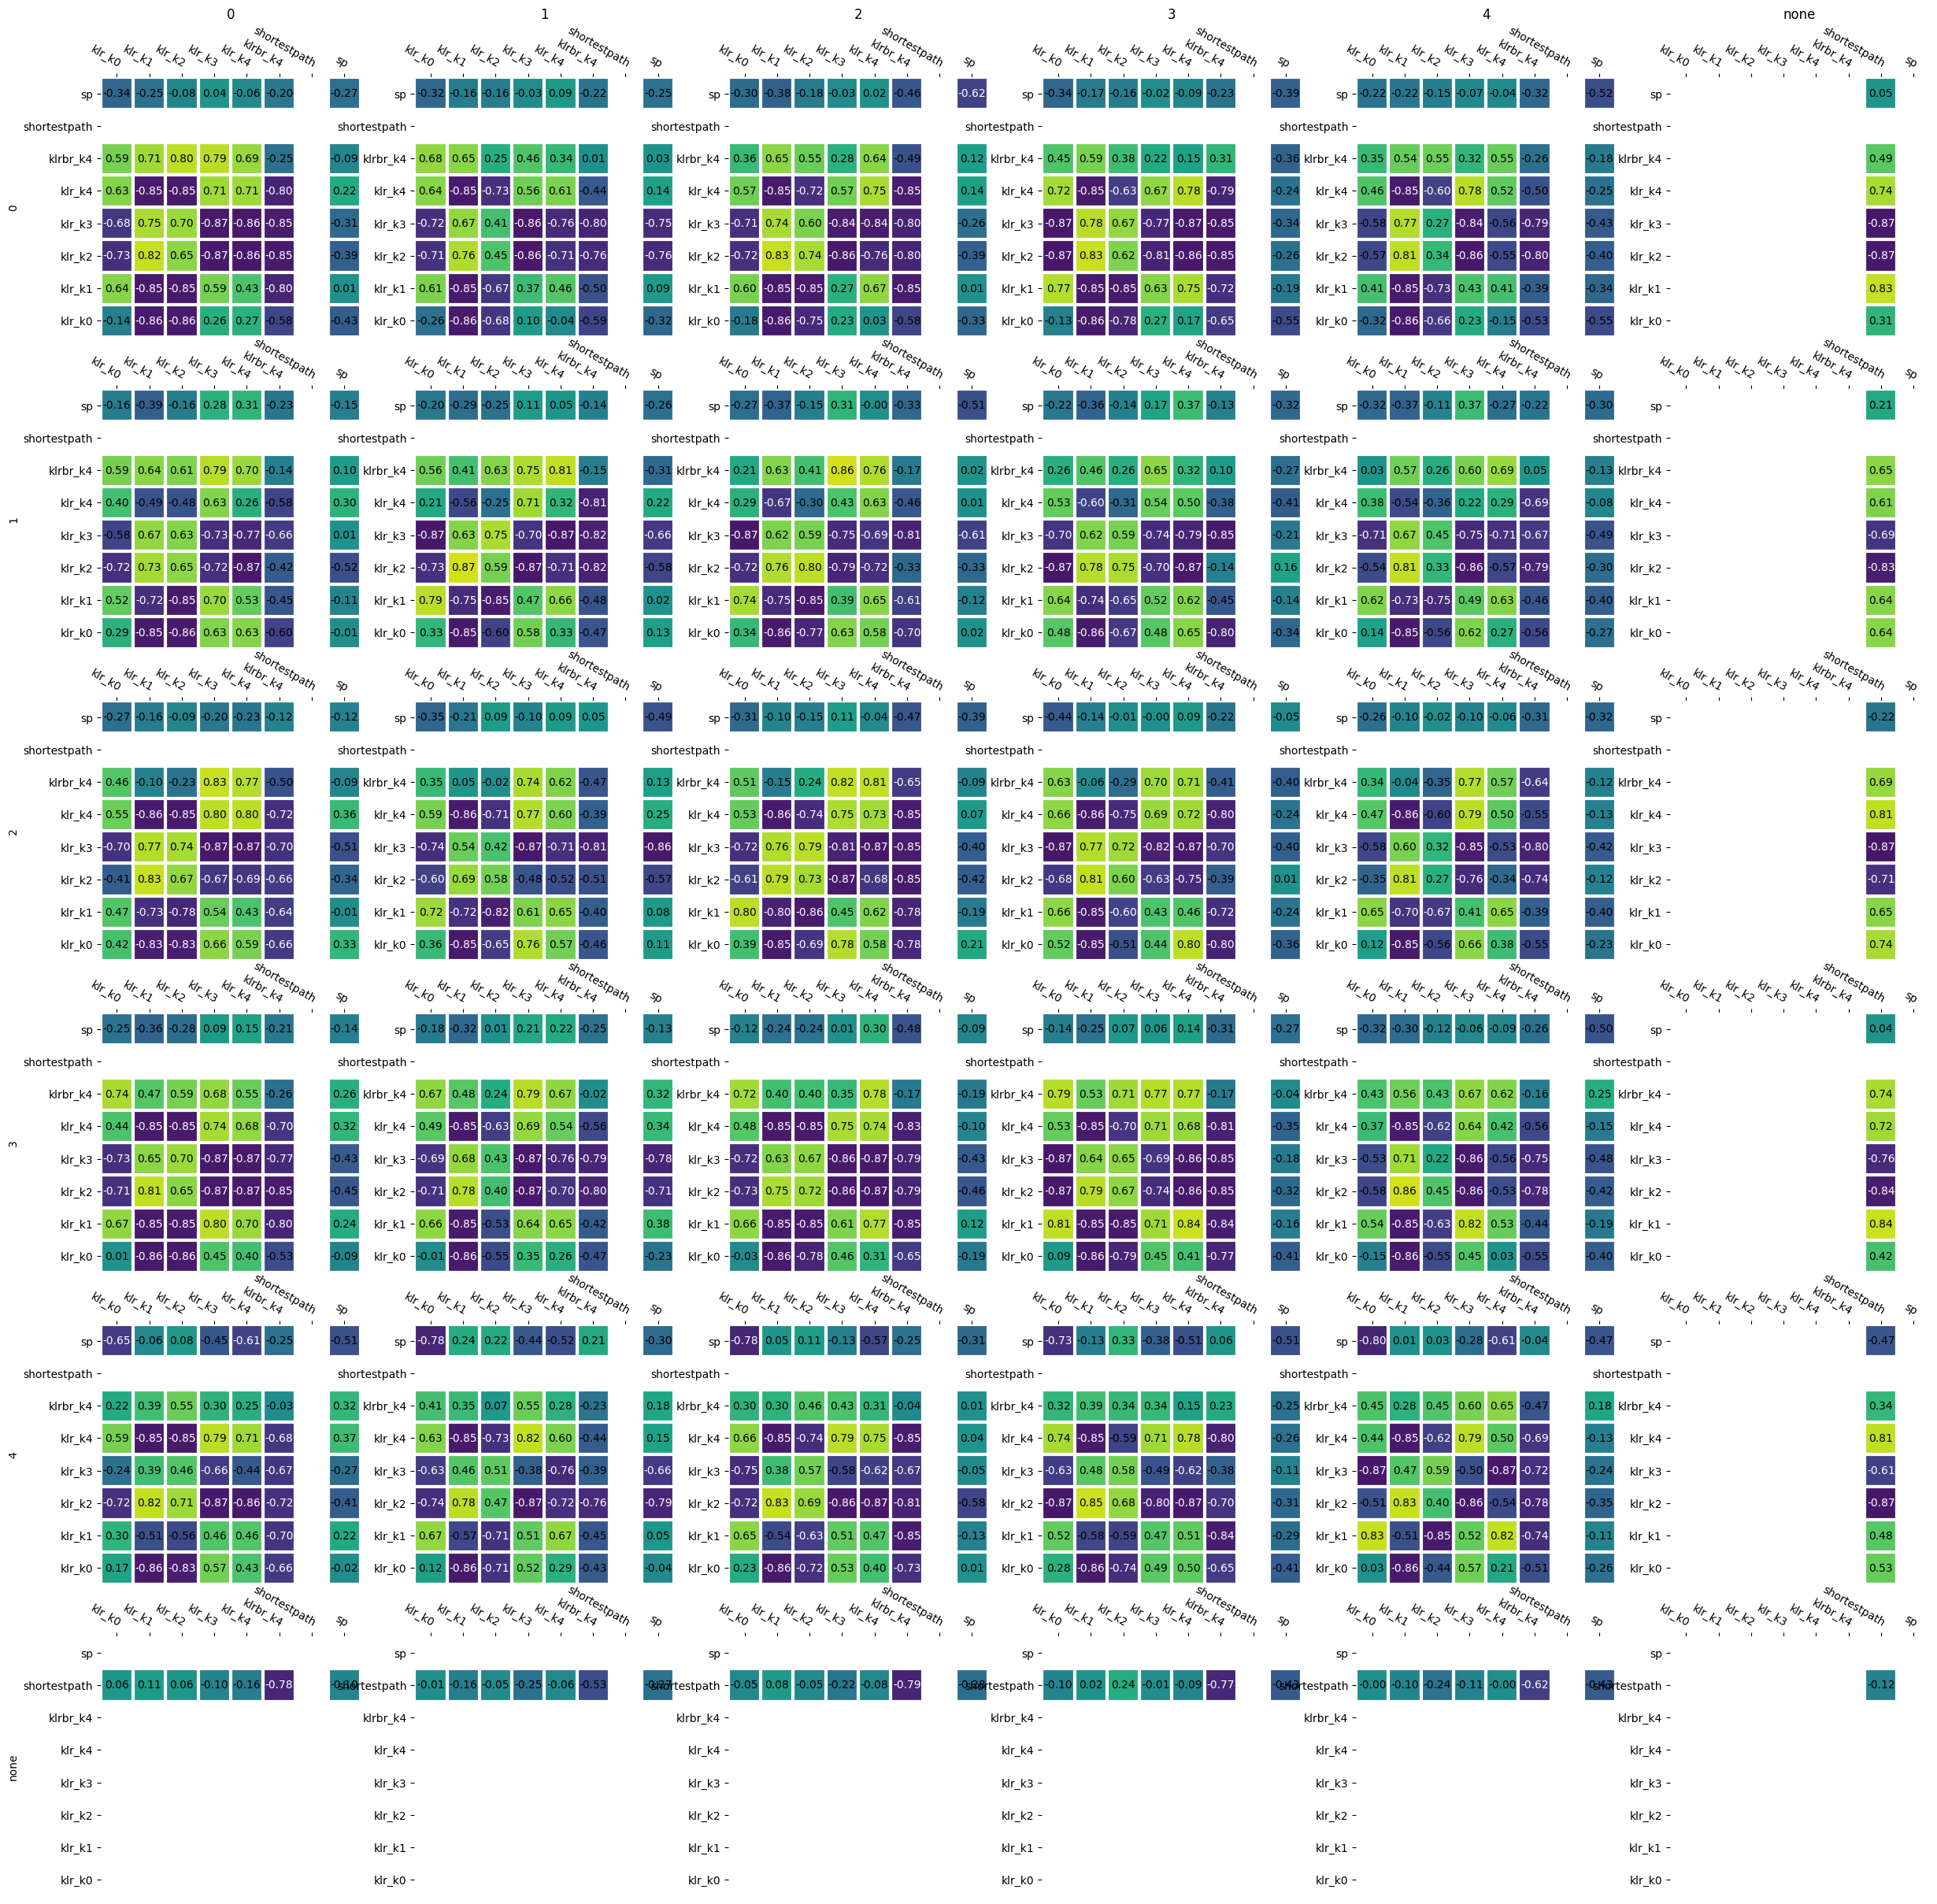

In [8]:
# Agent 0 performance
plot_utils.plot_pairwise_population_comparison(
    df0, 
    y_key="episode_return_mean", 
    pop_key="policy_seed",
    policy_key="policy_type",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(-1.0, 1.0), 
    figsize=(30, 30), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

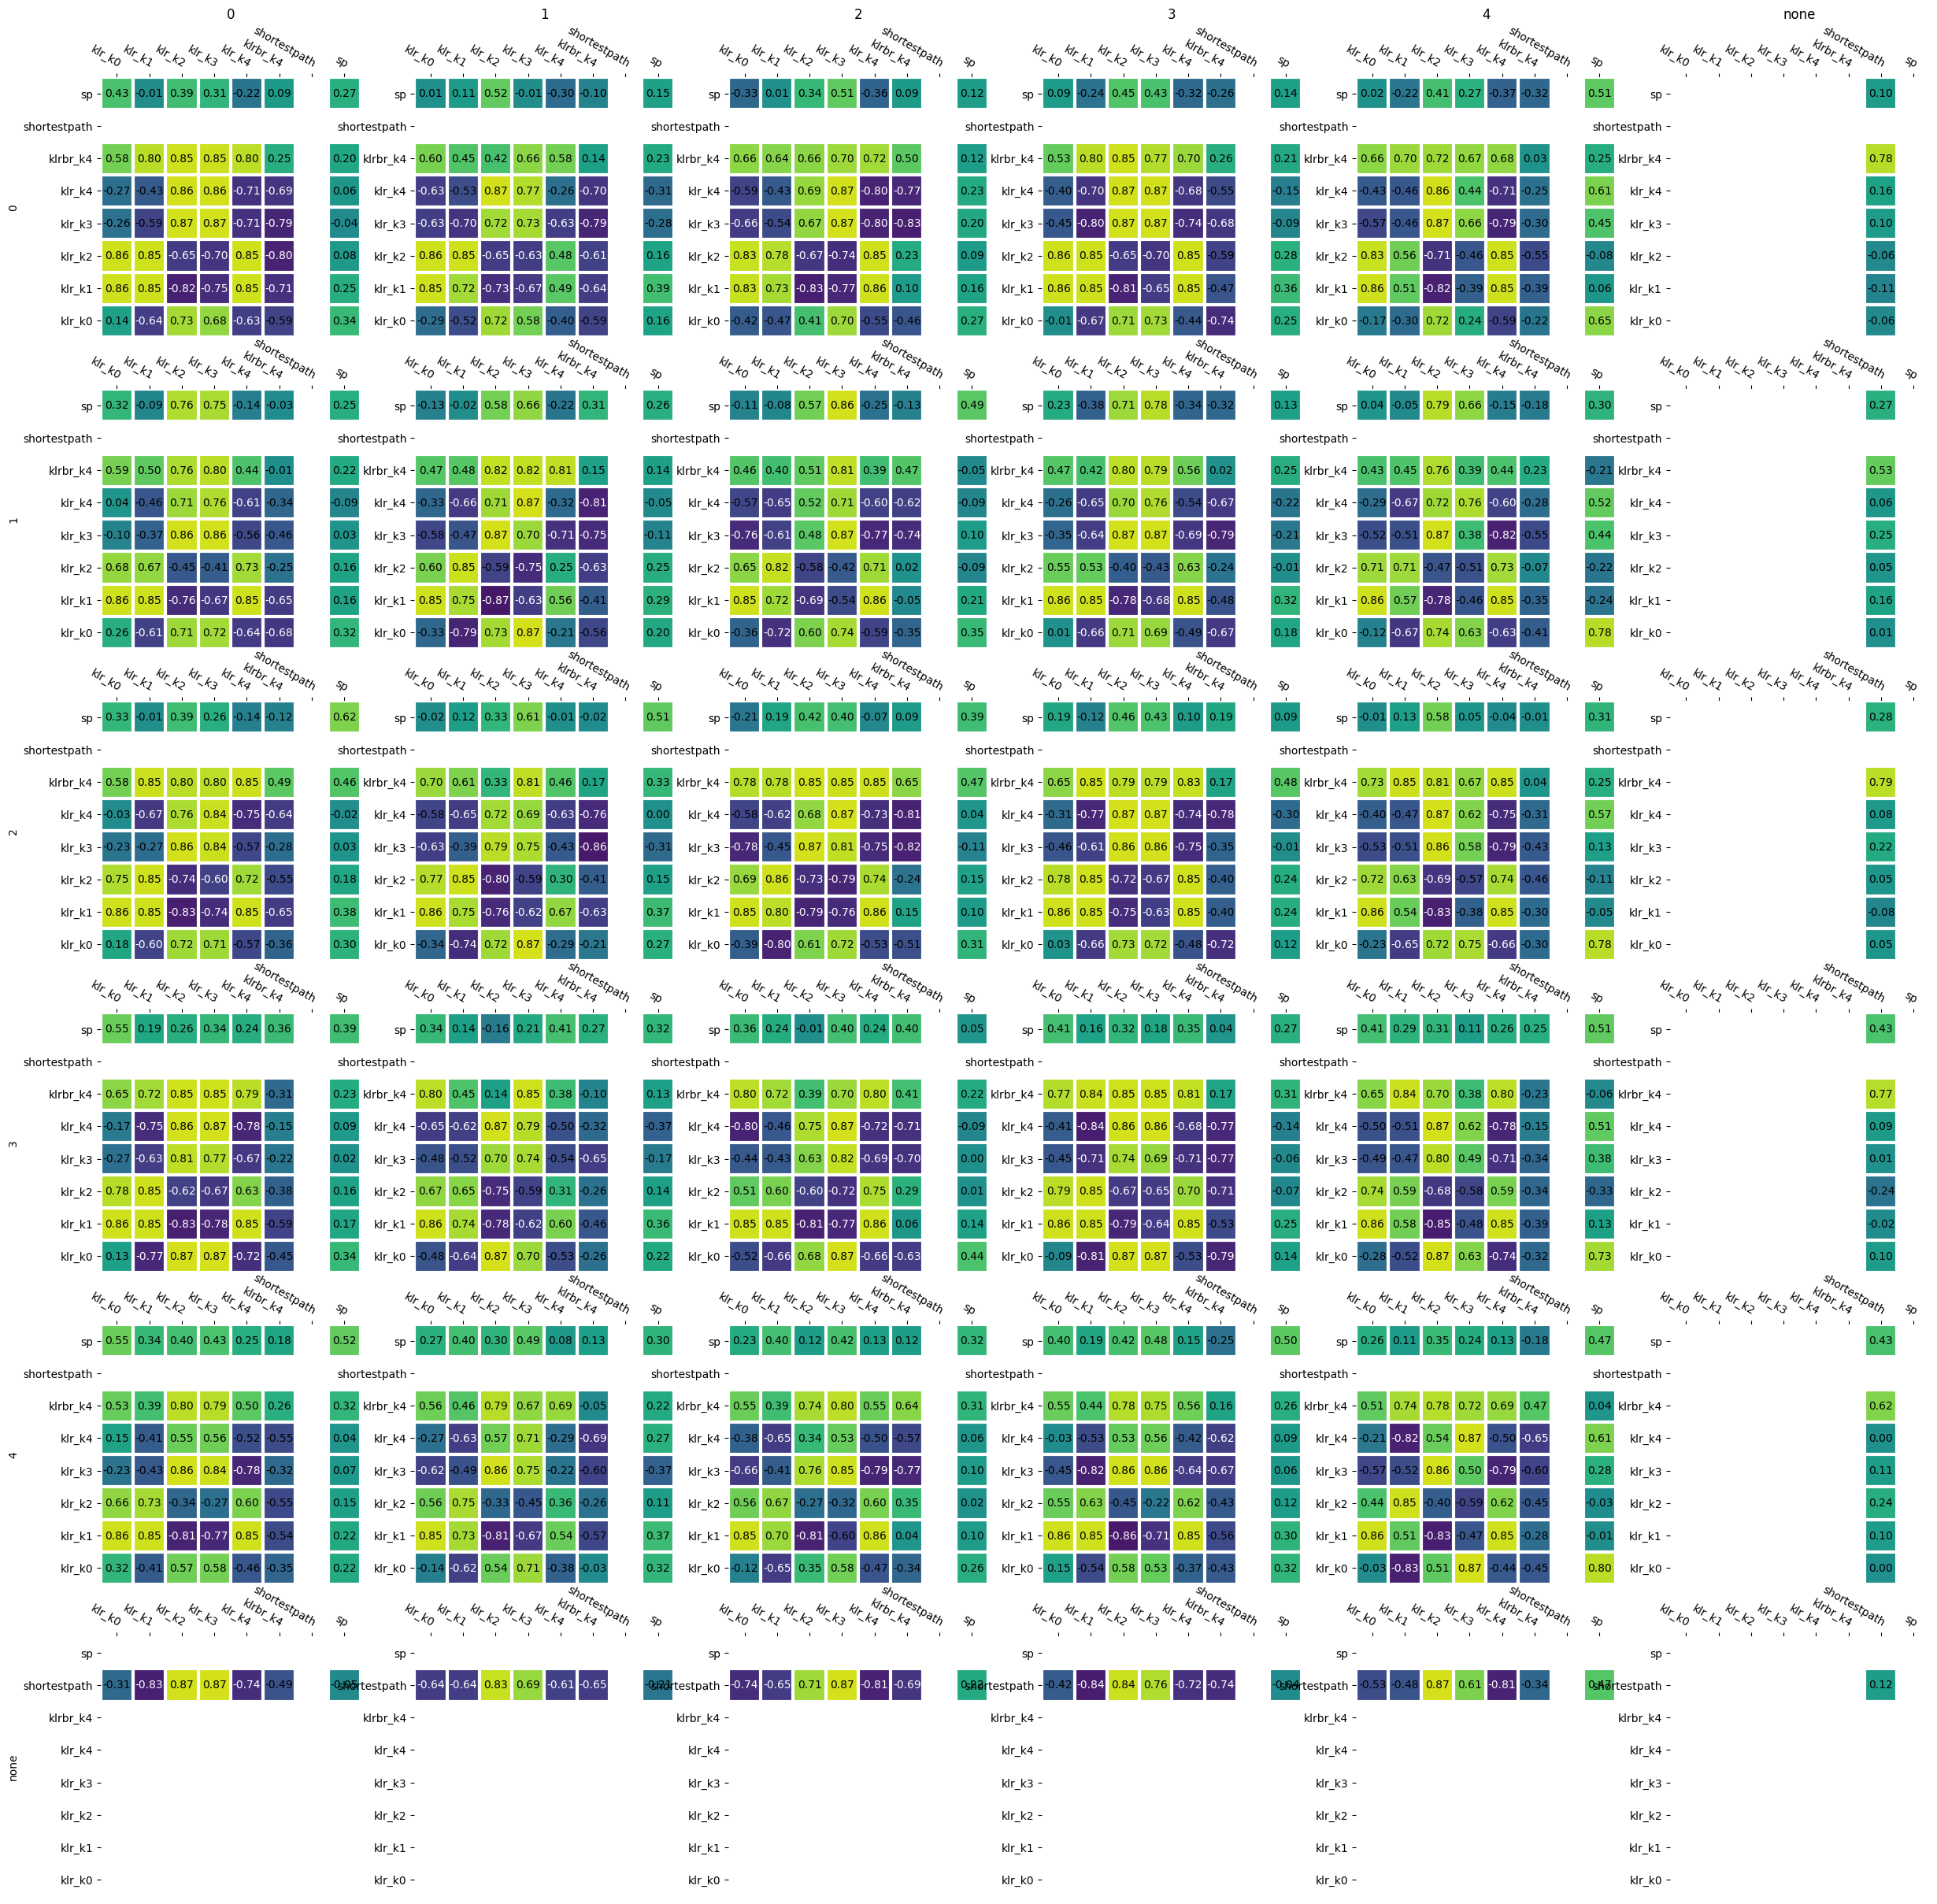

In [9]:
# Agent 1 performance
plot_utils.plot_pairwise_population_comparison(
    df1, 
    y_key="episode_return_mean", 
    pop_key="policy_seed",
    policy_key="policy_type",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(-1.0, 1.0), 
    figsize=(30, 30), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

### RL average policy performance

Here we look at average performance of the policies learned using RL by themselves.

Each plot shows the *mean performance* for the *row* policy against the *column* policy.

The **left-hand plot** shows *same-play* performance. So performance of policies against policies from the same training population. With the values shown being the mean over all populations.

The **middle plot** shows *cross-play* performance. So performance of policies against policies from different training populations. With the values shown being the mean over all populations.

The **right-hand plot** shows the generalization gap which is just the difference between the *Same-Play* and *Cross-Play* performance.

/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:249: RuntimeWarning: Mean of empty slice
  sp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(sp_values)
/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:250: RuntimeWarning: Mean of empty slice
  xp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(xp_values)


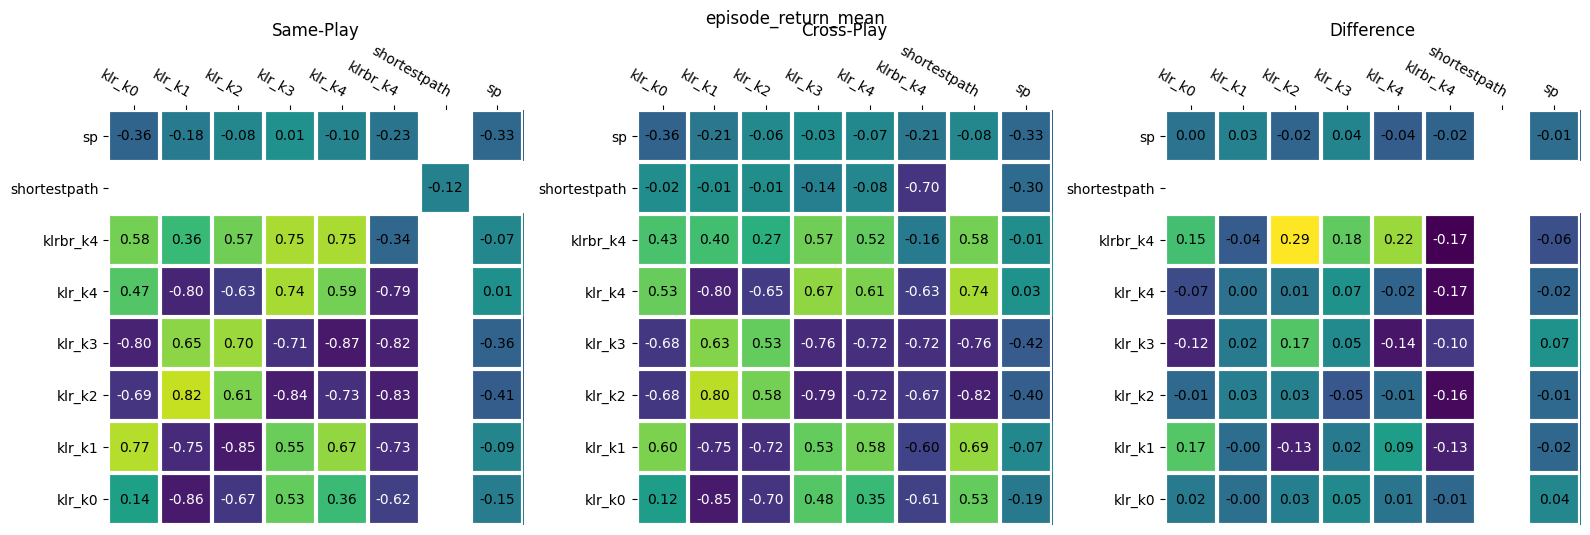

In [10]:
# Agent 0
plot_utils.plot_mean_pairwise_comparison(
    df0, 
    y_key="episode_return_mean", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(-1.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()

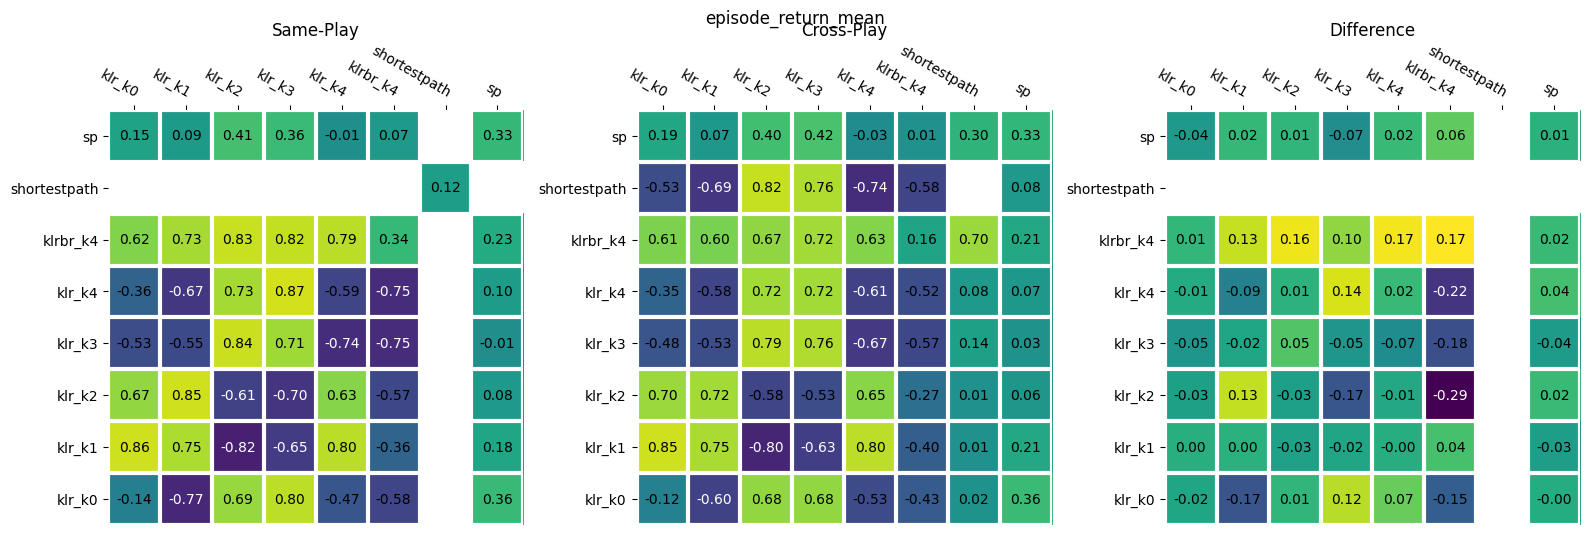

In [11]:
# Agent 1
plot_utils.plot_mean_pairwise_comparison(
    df1, 
    y_key="episode_return_mean", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(-1.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()

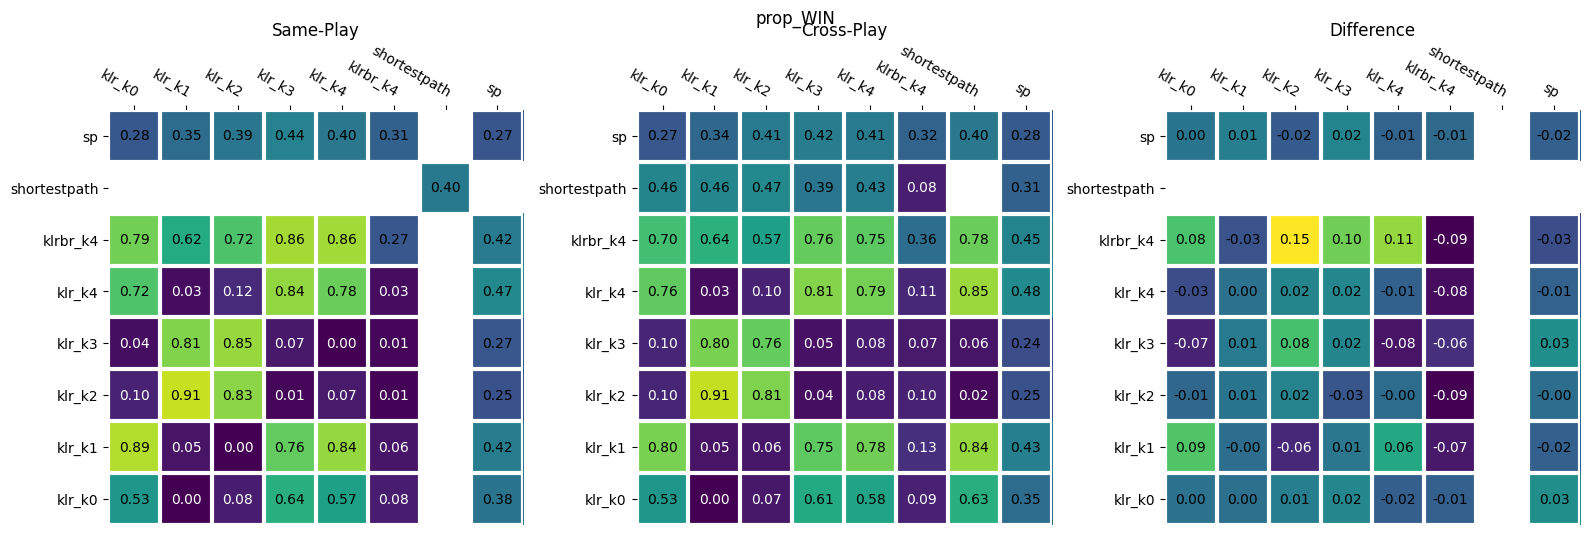

In [12]:
# Agent 0
plot_utils.plot_mean_pairwise_comparison(
    df0, 
    y_key="prop_WIN", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()

/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:249: RuntimeWarning: Mean of empty slice
  sp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(sp_values)
/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:250: RuntimeWarning: Mean of empty slice
  xp_pw_returns[row_policy_idx][col_policy_idx] = np.nanmean(xp_values)
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


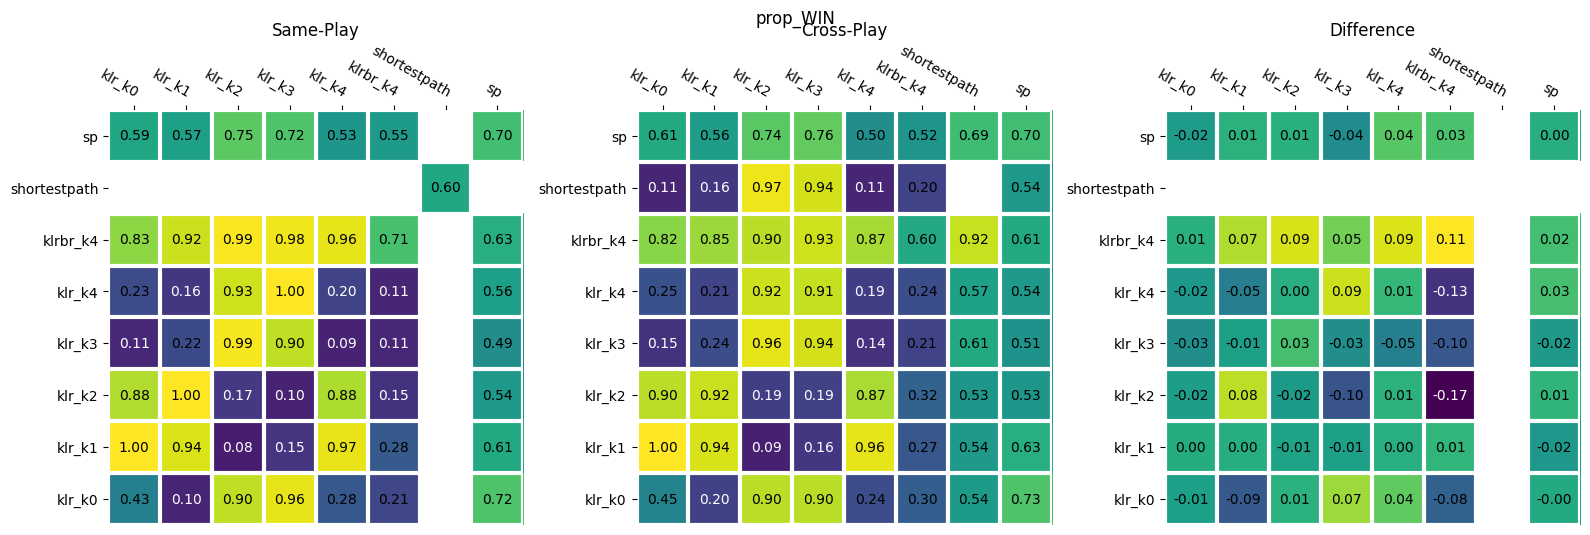

In [14]:
# Agent 1
plot_utils.plot_mean_pairwise_comparison(
    df1, 
    y_key="prop_WIN", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()

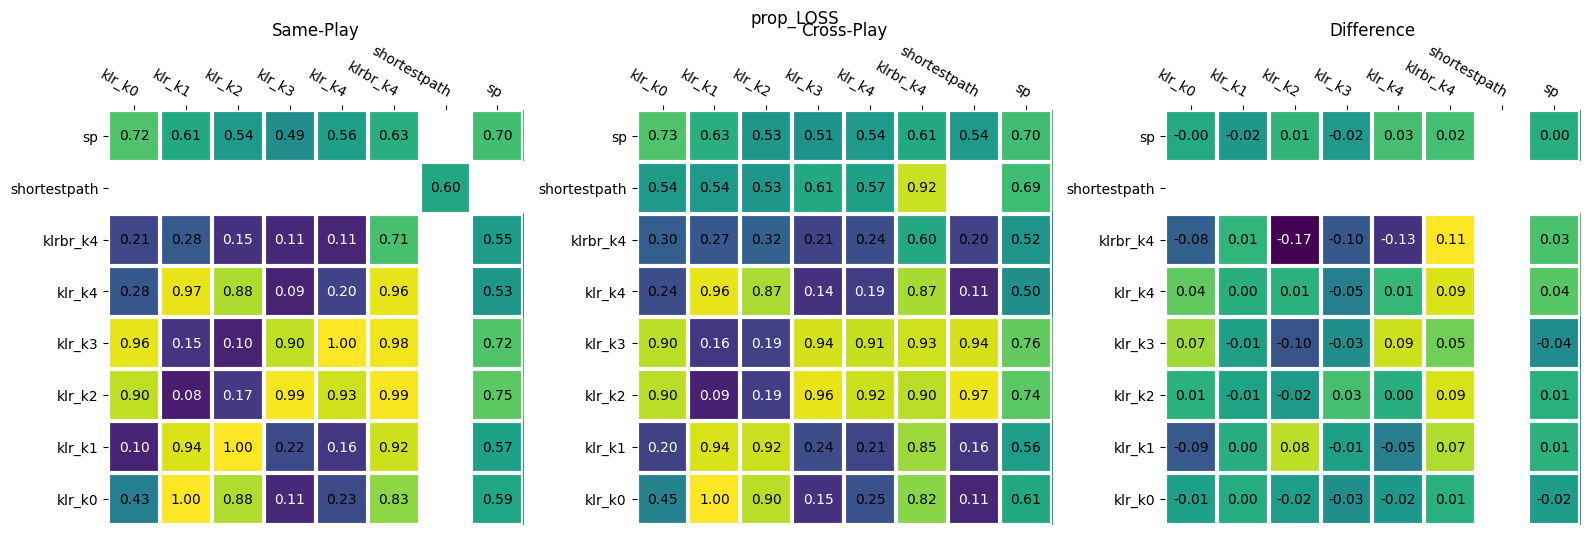

In [15]:
# Agent 0
plot_utils.plot_mean_pairwise_comparison(
    df0, 
    y_key="prop_LOSS", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()

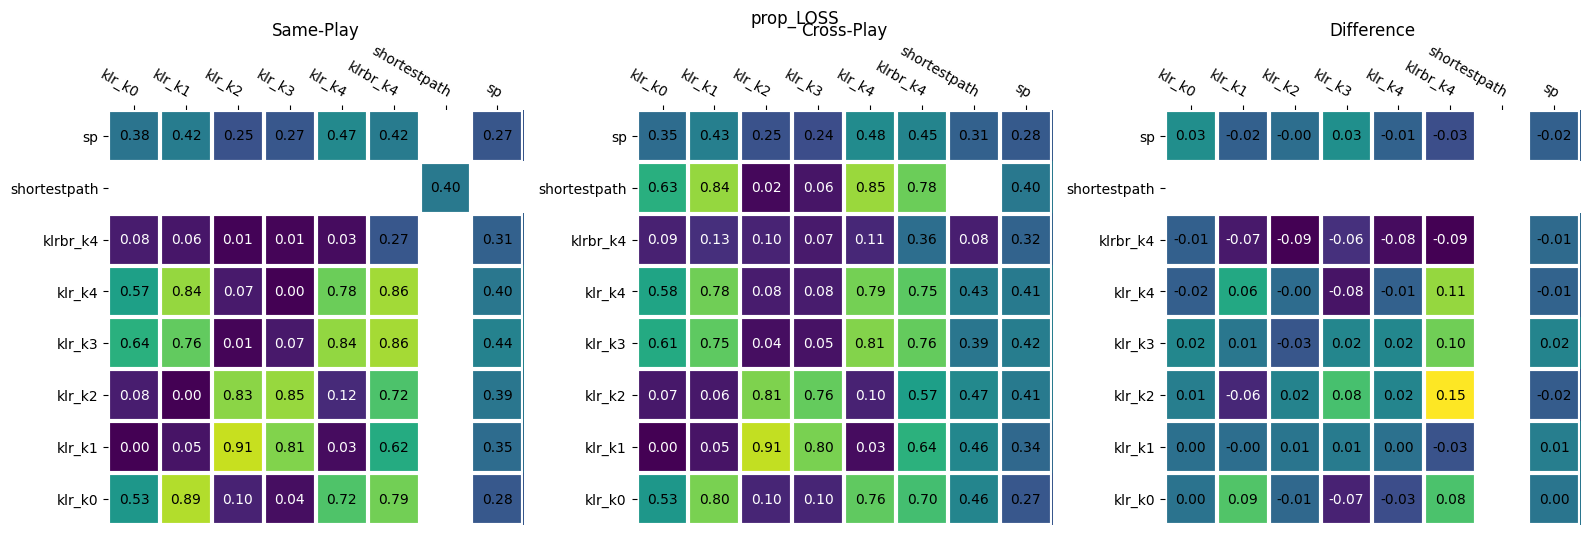

In [16]:
# Agent 1
plot_utils.plot_mean_pairwise_comparison(
    df1, 
    y_key="prop_LOSS", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0.0, 1.0), 
    figsize=(16, 6), 
    valfmt="{x:.2f}"
)
plt.show()